In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Read dataset
df = pd.read_csv('../data/SeoulBikeData.csv',
                 parse_dates=['Date'],
                 encoding='cp1250')

In [3]:
# Date features
df['Date_Month'] = df['Date'].apply(lambda x: x.month)
df['Date_Day'] = df['Date'].apply(lambda x: x.day)
df['Date_Weekday'] = df['Date'].apply(lambda x: x.weekday())
df.drop(columns=["Date"], inplace=True)

In [4]:
# Get dummies
df = pd.get_dummies(df, drop_first=True,
                    columns=['Seasons', 'Holiday', 'Functioning Day'])

In [5]:
# Normalize variables
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Rented Bike Count']),
                                                    df['Rented Bike Count'],
                                                    test_size=0.3)

In [7]:
# Model
model = keras.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(df.shape[1] - 1,)))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 167,169
Trainable params: 167,169
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train model
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(),
    metrics=["mean_squared_error"],
)

history = model.fit(X_train,
                    y_train,
                    batch_size=64,
                    epochs=400,
                    validation_split=0.2,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/400
77/77 [==============================] - 0s 4ms/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 2/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 3/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 4/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 5/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 6/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 7/400
77/77 [===============

77/77 [==============================] - 0s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 52/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 53/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 54/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 55/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 56/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 57/400
77/77 [=====================

77/77 [==============================] - 0s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 102/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 103/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 104/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 105/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 106/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 107/400
77/77 [===============

77/77 [==============================] - 0s 3ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 152/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 153/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 154/400
77/77 [==============================] - 0s 2ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 155/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 156/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 157/400
77/77 [===============

77/77 [==============================] - 0s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 202/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 203/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 204/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 205/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 206/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 207/400
77/77 [===============

77/77 [==============================] - 0s 3ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 252/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 253/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 254/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 255/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 256/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 257/400
77/77 [===============

Epoch 301/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 302/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 303/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 304/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 305/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 306/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 307/400
77/77 [=

77/77 [==============================] - 0s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 352/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 353/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 354/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 355/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 356/400
77/77 [==============================] - 0s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 357/400
77/77 [===============

83/83 - 0s - loss: 0.0076 - mean_squared_error: 0.0076
Test loss: 0.007636840455234051
Test MSE: 0.007636840455234051


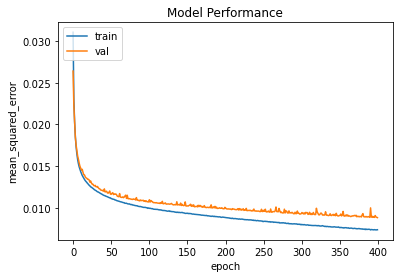

In [9]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test MSE:", test_scores[1])

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Performance')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()